# Stock price prediction using LSTM

In [10]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

# import Google Finanace API libraries
#from googlefinance.client import get_price_data

# import data visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# import other libraries
import datetime as dt
import time

## READING DATA

In [11]:
dataset = pd.read_csv('nifty_50_1day.csv')
print(dataset.head())

        Date    Close     Open     High      Low  Volume  Change
0  19-Dec-01  1060.75  1082.50  1086.35  1057.10  49.99M  -1.99%
1  20-Dec-01  1062.00  1060.45  1064.80  1047.50  55.79M   0.12%
2  21-Dec-01  1050.85  1061.80  1061.80  1043.65  47.17M  -1.05%
3  24-Dec-01  1048.50  1051.00  1055.00  1032.60  41.90M  -0.22%
4  26-Dec-01  1034.25  1048.90  1058.30  1030.50  42.61M  -1.36%


## ANALYZING DATA

In [12]:
dataset.describe()

,Close,Open,High,Low
count,4252.000000,4252.000000,4252.000000,4252.000000
mean,5216.385360,5218.379198,5253.489699,5177.484537
std,2853.714012,2857.376872,2863.256538,2844.730809
min,922.700000,922.550000,931.050000,920.000000
25%,2804.775000,2803.912500,2842.725000,2762.975000
50%,5185.050000,5185.775000,5219.725000,5117.650000
75%,7617.125000,7631.812500,7675.837500,7580.450000
max,11738.500000,11751.800000,11760.200000,11710.500000


In [13]:
bn_data = pd.read_csv('banknifty_1day.csv')
print(bn_data.head())

        Date    Close     Open     High      Low Vol  Change
0  10-Jun-05  3593.55  3640.05  3665.80  3585.80   -  -1.18%
1  13-Jun-05  3642.90  3593.90  3648.40  3556.70   -   1.37%
2  14-Jun-05  3689.80  3649.05  3696.35  3637.70   -   1.29%
3  15-Jun-05  3683.85  3700.80  3703.75  3662.85   -  -0.16%
4  16-Jun-05  3618.80  3684.40  3685.75  3607.20   -  -1.77%


In [14]:
bn_data.describe()

,Close,Open,High,Low
count,3374.000000,3374.000000,3374.000000,3374.000000
mean,12529.082869,12534.881283,12640.945984,12414.988826
std,6701.389841,6704.893778,6722.931446,6678.286703
min,3339.700000,3385.400000,3446.750000,3314.550000
25%,7106.175000,7114.500000,7227.800000,6995.875000
50%,10742.125000,10753.675000,10873.600000,10658.750000
75%,17600.325000,17622.275000,17714.825000,17485.625000
max,28320.000000,28379.900000,28388.650000,28171.650000


In [28]:

print("\n")
print("Open   => mean :", np.mean(dataset['Open']),  "  \t Std: ", np.std(dataset['Open']),  "  \t Max: ", np.max(dataset['Open']),  "  \t Min: ", np.min(dataset['Open']))
print("High   => mean :", np.mean(dataset['High']),  "  \t Std: ", np.std(dataset['High']),  "  \t Max: ", np.max(dataset['High']),  "  \t Min: ", np.min(dataset['High']))
print("Low    => mean :", np.mean(dataset['Low']),   "  \t Std: ", np.std(dataset['Low']),   "  \t Max: ", np.max(dataset['Low']),   "  \t Min: ", np.min(dataset['Low']))
print("Close  => mean :", np.mean(dataset['Close']), "  \t Std: ", np.std(dataset['Close']), "  \t Max: ", np.max(dataset['Close']), "  \t Min: ", np.min(dataset['Close']))
#print("Volume => mean :", np.mean(dataset['Volume']),"  \t Std: ", np.std(dataset['Volume']),"  \t Max: ", np.max(dataset['Volume']),"  \t Min: ", np.min(dataset['Volume']))






Open   => mean : 5218.37919802446   	 Std:  2857.0408485025837   	 Max:  11751.8   	 Min:  922.55
High   => mean : 5253.4896989651925   	 Std:  2862.9198225317955   	 Max:  11760.2   	 Min:  931.05
Low    => mean : 5177.4845366886175   	 Std:  2844.3962720816326   	 Max:  11710.5   	 Min:  920.0
Close  => mean : 5216.385359830669   	 Std:  2853.3784189822222   	 Max:  11738.5   	 Min:  922.7


## DATA EXPLORATION

Text(0, 0.5, 'Nifty 50')

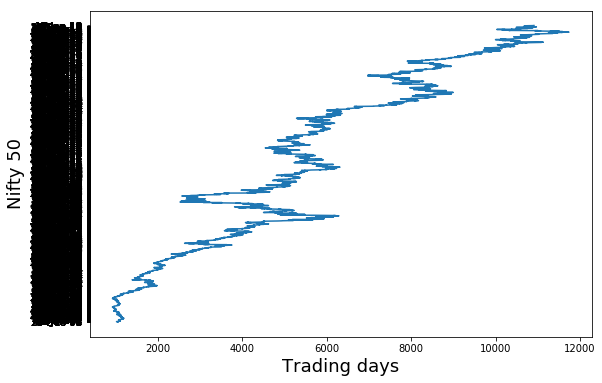

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
plt.plot(dataset['Close'], dataset['Date'])
plt.xlabel('Trading days', fontsize=18)
plt.ylabel('Nifty 50', fontsize=18)


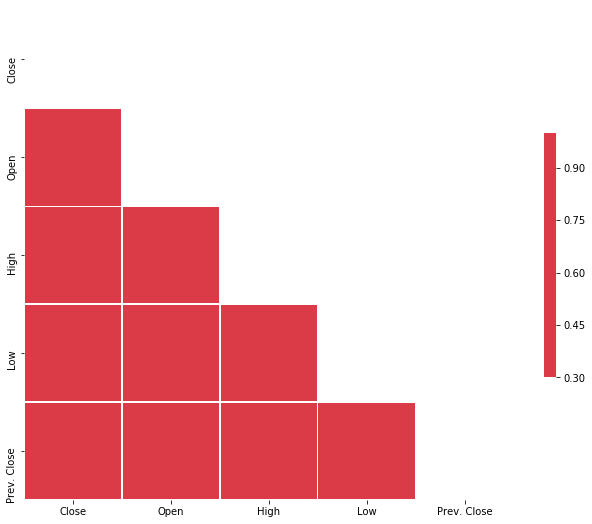

In [19]:
#Generate Correlation Matrix
dataset["Prev. Close"] = dataset.iloc[:, 1].shift(1)

corr = dataset.iloc[:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## PRE-PROCESSING DATA

## 1 BENCHMARK MODEL

In [10]:
from sklearn.preprocessing import MinMaxScaler
import csv
scaler = MinMaxScaler()
#print(data)
dataset["Prev. Close"] = dataset.iloc[:, 1].shift(1)
data=dataset.iloc[:, [2,7]].values

X = data[:]
print(X)
y = dataset['Close']

y_new = []
for i in y:
    y_new.append([i])
y_new = np.array(y_new)


X = np.array(X)

X=scaler.fit_transform(X)
y_new=scaler.fit_transform(y_new)



[[ 1082.5       nan]
 [ 1060.45  1060.75]
 [ 1061.8   1062.  ]
 ...
 [10899.65 10886.8 ]
 [10920.85 10890.3 ]
 [10914.85 10905.2 ]]


## 2 LSTM MODEL


In [48]:
new_data = scaler.fit_transform(data)
print(new_data[1])

train_X = new_data

train_y_old = dataset['Close']

train_Y = []
for i in train_y_old:
    train_Y.append([i])
train_Y = np.array(train_Y)
print(train_Y.shape)


train_X = np.array(train_X)
train_Y = np.array(train_Y)
train_Y = scaler.fit_transform(train_Y)

print(train_X .shape)
print(train_Y.shape)

[0.01273403 0.01276373]
(4252, 1)
(4252, 2)
(4252, 1)


## LINEAR REGRESSION MODEL 

### a) SPLITTING DATA 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[1:], y_new[1:], test_size = 0.3,shuffle = False,random_state = 0)
print(X_train[1])
print(y_train[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

[0.01285869 0.01287931]
[0.01184841]
(2975, 2)
(1276, 2)
(2975, 1)
(1276, 1)


### b) INITIALISING MODEL

In [50]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model =model.fit(X_train,y_train)
predicted_price = model.predict(X_test)
predicted_train = model.predict(X_train)
print(model.coef_)
print(model.intercept_)

[[0.96726238 0.0325635 ]]
[0.00035621]


### c) DISPLAYING RESULT

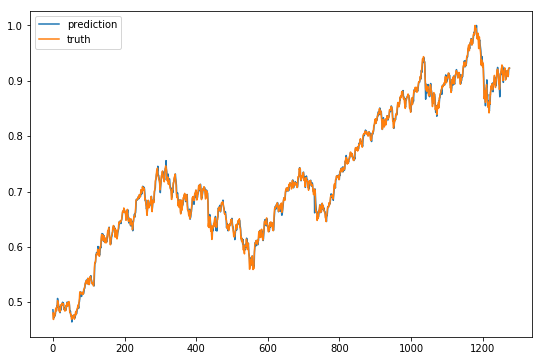

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
plt.plot(predicted_price, label='prediction')
plt.plot(y_test, label='truth')
plt.legend()
plt.show()

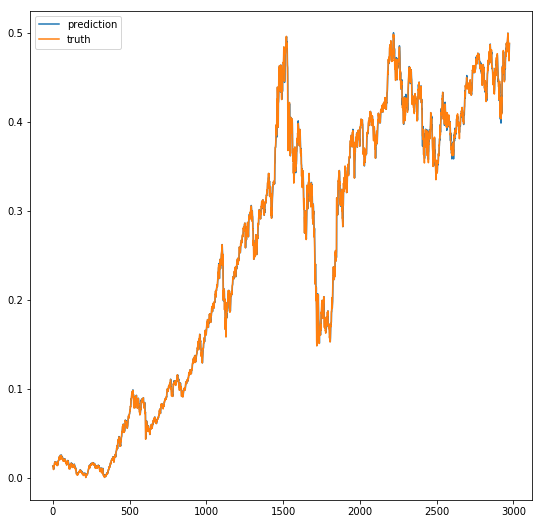

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.plot(predicted_train, label='prediction')
plt.plot(y_train, label='truth')
plt.legend()
plt.show()

### d) CALCULATING ERRORS

In [53]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,predicted_price),np.sqrt(mean_squared_error(y_test,predicted_price))

(0.9979153478930202, 0.005797092168037458)

## LSTM MODEL

### a) SPLITTING DATA 

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X[1:], train_Y[1:], test_size = 0.3,shuffle = False,random_state = 0)
print(y_train[1])
print(X_train[1])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

[0.01184841]
[0.01285869 0.01287931]
(2975, 2)
(1276, 2)
(2975, 1)


### WINDOW CREATION

In [55]:
def windowing(data, window):
    
    sequence = []
    for index in range(len(data) - window):
        sequence.append(data[index: index + window])
    return np.asarray(sequence)

In [56]:
window = 5
X_train2 = windowing(X_train, window)
X_test2 = windowing(X_test, window)
y_train2 = y_train[-X_train2.shape[0]:]
y_test2 = y_test[-X_test2.shape[0]:]

print("x_train", X_train2.shape)
print("y_train", y_train2.shape)
print("x_test", X_test2.shape)
print("y_test", y_test2.shape)

x_train (2970, 5, 2)
y_train (2970, 1)
x_test (1271, 5, 2)
y_test (1271, 1)


In [57]:
print(X_train.shape[0])

2975


In [58]:
print(X_train.shape[1])

2


### b) RESHAPING DATA

In [59]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [60]:
print(X_train.shape)

(2975, 1, 2)


### c) INITIALISING MODEL

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM,Dropout

model = Sequential()
 

model.add(LSTM(units=300, return_sequences=True, input_shape = (X_train.shape[1], 2)))
model.add(Dropout(.2))
 

model.add(LSTM(units=150, return_sequences=False))
model.add(Dropout(.2))




model.add(Dense(units=1, activation='sigmoid'))
 
# Compiling the RN
model.compile(loss='mae', optimizer='nadam', metrics=['mean_squared_error'])

# Train :)
history = model.fit(X_train,y_train, epochs=50,validation_split=0.1, batch_size=32)

############ Save & load Trained Model ############
# Save Trained Model
model.save('TICKER-RNN.h5')

Train on 2677 samples, validate on 298 samples
Epoch 1/50
2677/2677 [==============================] - 11s 4ms/step - loss: 0.1085 - mean_squared_error: 0.0244 - val_loss: 0.0169 - val_mean_squared_error: 3.2489e-04
Epoch 2/50
2677/2677 [==============================] - 3s 1ms/step - loss: 0.0191 - mean_squared_error: 5.7154e-04 - val_loss: 0.0046 - val_mean_squared_error: 3.4863e-05
Epoch 3/50
2677/2677 [==============================] - 3s 1ms/step - loss: 0.0152 - mean_squared_error: 3.7965e-04 - val_loss: 0.0059 - val_mean_squared_error: 5.5659e-05
Epoch 4/50
2677/2677 [==============================] - 3s 1ms/step - loss: 0.0137 - mean_squared_error: 3.0292e-04 - val_loss: 0.0096 - val_mean_squared_error: 1.2170e-04
Epoch 5/50
2677/2677 [==============================] - 3s 1ms/step - loss: 0.0130 - mean_squared_error: 2.6360e-04 - val_loss: 0.0054 - val_mean_squared_error: 4.8913e-05
Epoch 6/50
2677/2677 [==============================] - 3s 1ms/step - loss: 0.0128 - mean_square

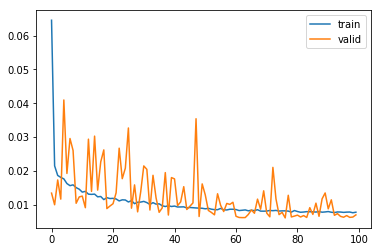

In [152]:

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.show()

In [154]:
trainPredict = model.predict(X_train2)
testPredict = model.predict(X_test2)


### d) DISPLAYING RESULT

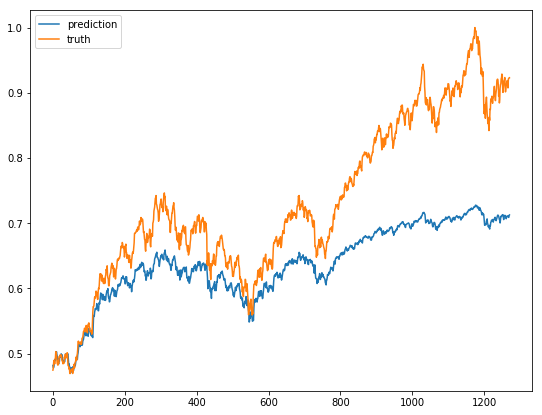

In [155]:
plt.figure(figsize=(9,7))
plt.plot(testPredict, label='prediction')
plt.plot(y_test2, label='truth')
plt.legend()
plt.show()

### e) CALCULATING ERRORS

In [157]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test2,testPredict),np.sqrt(mean_squared_error(y_test2,testPredict))

(0.17096111760040789, 0.11493431021397163)

## IMPROVED LSTM MODEL

In [124]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM,Dropout

model = Sequential()
 

model.add(LSTM(units=200, return_sequences=True, input_shape = (X_train2.shape[1], 2)))
model.add(Dropout(.2))
 

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(.2))




model.add(Dense(units=1, activation='sigmoid'))
 
model.compile(loss='mae', optimizer='nadam', metrics=['mean_squared_error'])

history = model.fit(X_train2,y_train2, epochs=50,validation_split=0.1, batch_size=32)

Train on 2673 samples, validate on 297 samples
Epoch 1/50
2673/2673 [==============================] - 8s 3ms/step - loss: 0.0383 - mean_squared_error: 0.0035 - val_loss: 0.0371 - val_mean_squared_error: 0.0015
Epoch 2/50
2673/2673 [==============================] - 3s 1ms/step - loss: 0.0232 - mean_squared_error: 0.0010 - val_loss: 0.0583 - val_mean_squared_error: 0.0035
Epoch 3/50
2673/2673 [==============================] - 3s 1ms/step - loss: 0.0202 - mean_squared_error: 7.9883e-04 - val_loss: 0.0178 - val_mean_squared_error: 4.0312e-04
Epoch 4/50
2673/2673 [==============================] - 3s 1ms/step - loss: 0.0198 - mean_squared_error: 7.6781e-04 - val_loss: 0.0089 - val_mean_squared_error: 1.2211e-04
Epoch 5/50
2673/2673 [==============================] - 3s 1ms/step - loss: 0.0186 - mean_squared_error: 7.0362e-04 - val_loss: 0.0297 - val_mean_squared_error: 9.7528e-04
Epoch 6/50
2673/2673 [==============================] - 3s 1ms/step - loss: 0.0173 - mean_squared_error: 5.79

### PREDICTING RESULTS

In [125]:
trainPredict = model.predict(X_train2)
testPredict = model.predict(X_test2)

### CALCULATING ERRORS

In [126]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test2,testPredict),np.sqrt(mean_squared_error(y_test2,testPredict))

(0.868274570637904, 0.04581387803265262)

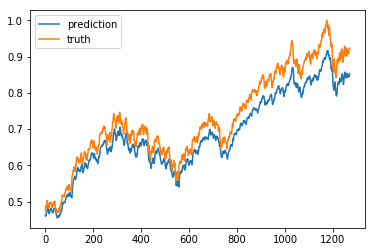

In [127]:
plt.plot(testPredict, label='prediction')
plt.plot(y_test2, label='truth')
plt.legend()
plt.show()

### ROBUSTBNESS CHECK

In [143]:
def get_data(path):
    dataframe = pd.read_csv(path)
    print(dataframe.head())
    return
      

    
  

data = get_data('banknifty_1day.csv')

        Date    Close     Open     High      Low Vol  Change
0  10-Jun-05  3593.55  3640.05  3665.80  3585.80   -  -1.18%
1  13-Jun-05  3642.90  3593.90  3648.40  3556.70   -   1.37%
2  14-Jun-05  3689.80  3649.05  3696.35  3637.70   -   1.29%
3  15-Jun-05  3683.85  3700.80  3703.75  3662.85   -  -0.16%
4  16-Jun-05  3618.80  3684.40  3685.75  3607.20   -  -1.77%


In [144]:
dataset = pd.read_csv('banknifty_1day.csv')
print(dataset.head())

        Date    Close     Open     High      Low Vol  Change
0  10-Jun-05  3593.55  3640.05  3665.80  3585.80   -  -1.18%
1  13-Jun-05  3642.90  3593.90  3648.40  3556.70   -   1.37%
2  14-Jun-05  3689.80  3649.05  3696.35  3637.70   -   1.29%
3  15-Jun-05  3683.85  3700.80  3703.75  3662.85   -  -0.16%
4  16-Jun-05  3618.80  3684.40  3685.75  3607.20   -  -1.77%


### DATA PRE PROCESSING

In [145]:
dataset["Prev. Close"] = dataset.iloc[:, 1].shift(1)
data=dataset.iloc[:, [2,7]].values
new_data = scaler.fit_transform(data)
print(new_data[1])

train_X = new_data

train_y_old = dataset['Close']

train_Y = []
for i in train_y_old:
    train_Y.append([i])
train_Y = np.array(train_Y)
print(train_Y.shape)


train_X = np.array(train_X)
train_Y = np.array(train_Y)
train_Y = scaler.fit_transform(train_Y)

print(train_X .shape)
print(train_Y.shape)


[0.00834184 0.01016201]
(3374, 1)
(3374, 2)
(3374, 1)


In [146]:
window = 5
train_X = windowing(train_X , window)
train_Y = train_Y[-train_X .shape[0]:]


In [147]:
print(train_X.shape)
print(train_Y.shape)

(3369, 5, 2)
(3369, 1)


In [148]:
print(train_X.shape[1])

5


### PREDICTING WITH IMPROVED MODEL

In [149]:
trainPredict = model.predict(train_X[1:])


ValueError: Error when checking input: expected lstm_21_input to have shape (1, 2) but got array with shape (5, 2)

### CALCULATING ERROR

In [135]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(train_Y[1:],trainPredict),np.sqrt(mean_squared_error(train_Y[1:],trainPredict))

(0.9888321362085575, 0.028326446746622394)

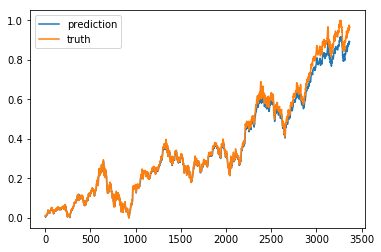

In [136]:
plt.plot(trainPredict, label='prediction')
plt.plot(train_Y, label='truth')
plt.legend()
plt.show()